# **Importing Data**

In [ ]:
import pandas as pd
import numpy as np
import os

In [ ]:
mas_aavedan = pd.read_csv("mas_aavedan9oct.csv")


In [ ]:
# mas_aavedan.head()

In [ ]:
# output_directory = 'department'
# Create the directory if it doesn't exist
# os.makedirs(output_directory, exist_ok=True)

In [ ]:
unique_depart_ids = mas_aavedan['depart_id'].unique()

for depart_id in unique_depart_ids:
    subset_df = mas_aavedan[mas_aavedan['depart_id'] == depart_id]
    subset_filename = os.path.join(f'depart_id_{depart_id}.csv')
    subset_df.to_csv(subset_filename, index=False)

In [ ]:
mas_aavedan['depart_id'].unique()

array([2020, 2043, 2028, 2018, 2022, 2007, 2001,    0, 2016, 2015, 2047,
       2005, 2013, 2002, 2008, 2017, 2019, 2004, 2011, 2025, 2038, 2036,
       2033, 2040, 2031, 2026, 2030, 2014, 2023, 2010, 2012, 2044, 2034,
       2024])

In [ ]:
mas_aavedan[['avd_id','depart_id','eng_sub']]

,avd_id,depart_id,eng_sub
0,1375,2020,Regarding providing information on not providi...
1,1376,2043,Durg Children's Welfare Committee Member of Wo...
2,1377,2028,"Due to bureaucracy, ration card and ration whi..."
3,1378,2020,Request for admission under free quota in Atma...
4,1379,2018,Regarding applying obstacles (n. N. Durg)
...,...,...,...
1921,1370,2020,Regarding you to recruit our son in the school...
1922,1371,2002,Complaint letter regarding the applicant by he...
1923,1372,2018,Complaint application form (Municipal Corporat...
1924,1373,2020,Applicant children Shubham Nirmalkar to the go...


In [ ]:
zero_depart = mas_aavedan[mas_aavedan['depart_id'] == 0]
zero_depart.head(5)

,Unnamed: 0,avd_id,sr_no,source,user_id,type,avd_for,aavedak,father,mobile_no,...,clear_letter,clear_by,clear_remark,clear_date,rating,review,status,createdate,hin_sub,eng_sub
17,17,1392,DRG-C-509,1,66,1,स्वयं,समस्त मोहल्ले वासी,NaN,0,...,NaN,0,NaN,NaN,0,NaN,5,2023-07-20 9:31:52,नवगठित आंगनबाड़ी खोलने हेतु आवेदन पत्र (डीपीओ ...,Application form for opening newly formed Anga...
72,72,1447,DRG-D-157,0,254,2,स्वयं,vikash verma,arun verma,7987003827,...,NaN,0,NaN,NaN,0,NaN,5,2023-07-21 13:18:03,सैगोन बड़ी के गेट से वर्मा निवास तक 60 मितर सी...,60 Mitar CC Road Construction from Saigon Badi...
81,81,1456,DRG-C-546,0,220,1,अन्य व्यक्ति,अभिषेक टावरी,गोपाल दास टावरी,7000795930,...,NaN,0,NaN,NaN,0,NaN,5,2023-07-23 10:05:53,"मैंने इसके पहले शिकायत की थी, जिसका शिकायत क्र...","I had complained before this, whose complaint ..."
82,82,1457,DRG-C-547,0,264,1,समुदाय,NOVEL KUMAR SAHU,ISHWAR PRASAD SAHU,8871087890,...,NaN,0,NaN,NaN,0,NaN,5,2023-07-23 13:10:45,महाराणा प्रताप नगर बोरसी दुर्ग वार्ड क्रमांक 5...,In Maharana Pratap Nagar Borsi Durg Ward No. 5...
83,83,1458,PTN-C-163,0,266,1,स्वयं,अनुसूइया,सुरेन्द्र,9301176736,...,NaN,0,NaN,NaN,0,NaN,5,2023-07-24 5:39:34,सहकारी समिति तर्रा धारा कर्ज नही दिया जा रहा है,Cooperative society is not being given loans


In [ ]:
depart = mas_aavedan[mas_aavedan['depart_id'] != 0]
depart[['avd_id','depart_id','eng_sub']].head(5)

,avd_id,depart_id,eng_sub
0,1375,2020,Regarding providing information on not providi...
1,1376,2043,Durg Children's Welfare Committee Member of Wo...
2,1377,2028,"Due to bureaucracy, ration card and ration whi..."
3,1378,2020,Request for admission under free quota in Atma...
4,1379,2018,Regarding applying obstacles (n. N. Durg)


In [ ]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
# from file import accuracy_final
from nltk.stem import WordNetLemmatizer

In [ ]:
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [ ]:
def preprocess(text):
  # 1. Lowercasing
  text = text.lower()
  # 2. Tokenization
  tokens = word_tokenize(text)
  # 3. Stopword Removal
  stop_words = set(stopwords.words('english'))
  filtered_tokens = [word for word in tokens if word not in stop_words]
  # # 4. Stemming
  # stemmer = PorterStemmer()
  # stemmed_tokens = [stemmer.stem(word) for word in filtered_tokens]
  # return stemmed_tokens
  # 4, Lemmatization
  lemmatizer = WordNetLemmatizer()
  lemmatized_data = [lemmatizer.lemmatize(word) for word in filtered_tokens]
  return lemmatized_data

In [ ]:
depart['lemmatized_data'] = depart['eng_sub'].apply(preprocess)
depart.head(6)

<ipython-input-14-fec8c6b2da9d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  depart['lemmatized_data'] = depart['eng_sub'].apply(preprocess)


,Unnamed: 0,avd_id,sr_no,source,user_id,type,avd_for,aavedak,father,mobile_no,...,clear_by,clear_remark,clear_date,rating,review,status,createdate,hin_sub,eng_sub,lemmatized_data
0,0,1375,DRG-D-135,1,66,2,स्वयं,रागिनी पांडेय,NaN,7898087004,...,2210000048,कार्यालयीन पत्र क्र. 9806/भवन/ दिनांक 20.07.20...,2023-07-25 5:19:16,0,NaN,2,2023-07-20 8:11:33,पूर्व माध्यमिक शाला द्वारा भवन उपलब्ध न कराने ...,Regarding providing information on not providi...,"[regarding, providing, information, providing,..."
1,1,1376,DRG-C-500,1,66,1,स्वयं,लाभचंद साहू,NaN,0,...,0,NaN,NaN,0,NaN,1,2023-07-20 8:21:07,दुर्ग बाल कल्याण समिति महिला बाल विकास की सदस्...,Durg Children's Welfare Committee Member of Wo...,"[durg, child, 's, welfare, committee, member, ..."
2,2,1377,DRG-C-501,1,66,1,स्वयं,श्रीमती रुकमणी सिंह,NaN,9425553941,...,0,NaN,NaN,0,NaN,1,2023-07-20 8:22:44,अफसरशाही के चलते राशन कार्ड व राशन जो मुस्ताचा...,"Due to bureaucracy, ration card and ration whi...","[due, bureaucracy, ,, ration, card, ration, sa..."
3,3,1378,DRG-D-136,1,66,2,स्वयं,दिव्या देशलहरे,W/O संजय देशलहरे,6263912599,...,2210000048,कार्यालयीन पत्र क्र. 10282/सेजेस के द्वारा आव...,2023-07-27 4:01:17,0,NaN,2,2023-07-20 8:28:32,आत्मानंद विद्यालय दुर्ग में फ्री कोटा के तहत प...,Request for admission under free quota in Atma...,"[request, admission, free, quota, atmanand, vi..."
4,4,1379,DRG-D-137,1,66,2,स्वयं,प्रकाश जोशी,NaN,9893943150,...,2210000010,उक्त आवेदन में निम्नांकित सथानो पर मुख्यमंत्री...,2023-08-07 1:30:12,0,NaN,2,2023-07-20 8:30:00,विघुत पोल लगाने हेतु बाबत (n.न। दुर्ग),Regarding applying obstacles (n. N. Durg),"[regarding, applying, obstacle, (, n., n., dur..."
5,5,1380,DRG-C-502,1,66,1,समुदाय,लोकेश सोनी,NaN,0,...,2210000010,उक्त वार्ड में गलियां सकरी होने कारण नालियों क...,2023-07-31 3:21:18,0,NaN,2,2023-07-20 8:35:35,गंदे ढंग से सड़क निर्माण की सुधार हेतु बाबत ( ...,Regarding improvement of road construction in ...,"[regarding, improvement, road, construction, d..."


In [ ]:
left = mas_aavedan
right = pd.read_csv("depart9oct.csv")

merge = pd.merge(left,right, how = "outer", on = "depart_id")

In [ ]:
right.head()

,Unnamed: 0,depart_id,vname,dt,eng_name
0,0,2001,सामान्य प्रशासन,2023-01-11 11:00:58,general Administration
1,1,2002,गृह विभाग,2023-01-11 11:00:58,Home department
2,2,2003,जेल विभाग,2023-01-11 11:00:58,Jail department
3,3,2004,वित्त विभाग,2023-01-11 11:00:58,finance department
4,4,2005,वाणिज्यिक कर विभाग,2023-01-11 11:00:58,Commercial tax department


In [ ]:
right["depart_id"].shape

(50,)

In [ ]:
abc = merge[['depart_id','eng_sub','eng_name']]

In [ ]:
abc = abc[abc['depart_id'] != 0]
abc = abc.dropna(subset=['eng_sub'])
abc

,depart_id,eng_sub,eng_name
0,2020,Regarding providing information on not providi...,School education department
1,2020,Request for admission under free quota in Atma...,School education department
2,2020,Regarding getting a seat under the right of Ra...,School education department
3,2020,Regarding the application for directing the sc...,School education department
4,2020,Claim objection regarding marking experience y...,School education department
...,...,...,...
1921,2044,Regarding providing Chhattisgarh Mati Art Boar...,Department of village industries
1922,2044,Regarding providing chalk and land,Department of village industries
1923,2044,Regarding providing chalk,Department of village industries
1924,2034,Regarding the removal of illegal construction ...,Animal Husbandry Department


In [ ]:
def to_string(wow):
  return " ".join(wow)

abc['lemmatized_data'] = abc['eng_sub'].apply(preprocess)
abc['new'] = abc['lemmatized_data'].apply(to_string)

abc

,depart_id,eng_sub,eng_name,lemmatized_data,new
0,2020,Regarding providing information on not providi...,School education department,"[regarding, providing, information, providing,...",regarding providing information providing buil...
1,2020,Request for admission under free quota in Atma...,School education department,"[request, admission, free, quota, atmanand, vi...",request admission free quota atmanand vidyalay...
2,2020,Regarding getting a seat under the right of Ra...,School education department,"[regarding, getting, seat, right, rateshiksha,...",regarding getting seat right rateshiksha appli...
3,2020,Regarding the application for directing the sc...,School education department,"[regarding, application, directing, school, wa...",regarding application directing school waive s...
4,2020,Claim objection regarding marking experience y...,School education department,"[claim, objection, regarding, marking, experie...",claim objection regarding marking experience y...
...,...,...,...,...,...
1921,2044,Regarding providing Chhattisgarh Mati Art Boar...,Department of village industries,"[regarding, providing, chhattisgarh, mati, art...",regarding providing chhattisgarh mati art boar...
1922,2044,Regarding providing chalk and land,Department of village industries,"[regarding, providing, chalk, land]",regarding providing chalk land
1923,2044,Regarding providing chalk,Department of village industries,"[regarding, providing, chalk]",regarding providing chalk
1924,2034,Regarding the removal of illegal construction ...,Animal Husbandry Department,"[regarding, removal, illegal, construction, dr...",regarding removal illegal construction drainag...


In [ ]:
depart.reindex().head()

,Unnamed: 0,avd_id,sr_no,source,user_id,type,avd_for,aavedak,father,mobile_no,...,clear_by,clear_remark,clear_date,rating,review,status,createdate,hin_sub,eng_sub,lemmatized_data
0,0,1375,DRG-D-135,1,66,2,स्वयं,रागिनी पांडेय,NaN,7898087004,...,2210000048,कार्यालयीन पत्र क्र. 9806/भवन/ दिनांक 20.07.20...,2023-07-25 5:19:16,0,NaN,2,2023-07-20 8:11:33,पूर्व माध्यमिक शाला द्वारा भवन उपलब्ध न कराने ...,Regarding providing information on not providi...,"[regarding, providing, information, providing,..."
1,1,1376,DRG-C-500,1,66,1,स्वयं,लाभचंद साहू,NaN,0,...,0,NaN,NaN,0,NaN,1,2023-07-20 8:21:07,दुर्ग बाल कल्याण समिति महिला बाल विकास की सदस्...,Durg Children's Welfare Committee Member of Wo...,"[durg, child, 's, welfare, committee, member, ..."
2,2,1377,DRG-C-501,1,66,1,स्वयं,श्रीमती रुकमणी सिंह,NaN,9425553941,...,0,NaN,NaN,0,NaN,1,2023-07-20 8:22:44,अफसरशाही के चलते राशन कार्ड व राशन जो मुस्ताचा...,"Due to bureaucracy, ration card and ration whi...","[due, bureaucracy, ,, ration, card, ration, sa..."
3,3,1378,DRG-D-136,1,66,2,स्वयं,दिव्या देशलहरे,W/O संजय देशलहरे,6263912599,...,2210000048,कार्यालयीन पत्र क्र. 10282/सेजेस के द्वारा आव...,2023-07-27 4:01:17,0,NaN,2,2023-07-20 8:28:32,आत्मानंद विद्यालय दुर्ग में फ्री कोटा के तहत प...,Request for admission under free quota in Atma...,"[request, admission, free, quota, atmanand, vi..."
4,4,1379,DRG-D-137,1,66,2,स्वयं,प्रकाश जोशी,NaN,9893943150,...,2210000010,उक्त आवेदन में निम्नांकित सथानो पर मुख्यमंत्री...,2023-08-07 1:30:12,0,NaN,2,2023-07-20 8:30:00,विघुत पोल लगाने हेतु बाबत (n.न। दुर्ग),Regarding applying obstacles (n. N. Durg),"[regarding, applying, obstacle, (, n., n., dur..."


In [ ]:
pip install transformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.7/7.7 MB 18.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.0/302.0 kB 34.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.8/3.8 MB 47.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 48.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 295.0/295.0 kB 29.8 MB/s eta 0:00:00


In [ ]:
from transformers import AutoTokenizer,AutoModel
tokenizer = AutoTokenizer.from_pretrained("bert-base-cased")
model = AutoModel.from_pretrained("bert-base-cased")

In [ ]:
ytrain= abc["depart_id"]

In [ ]:
X = abc['lemmatized_data']

In [ ]:
xtrain=[]
import torch
for item in X:
  st = ' '.join([str(word) for word in item])
  inputs = tokenizer(st, return_tensors="pt", padding=True, truncation=True)
  with torch.no_grad():
      outputs = model(**inputs)

  embed = outputs.last_hidden_state.mean(dim=1).squeeze().numpy()
  xtrain.append(embed)



In [ ]:
lxt=list(xtrain)

In [ ]:
# xtrain=np.array(xtrain)

In [ ]:
# xtrain.shape

In [ ]:
test={"Input":lxt}
xt=pd.DataFrame(lxt)

In [ ]:
xt

,0,1,2,3,4,5,6,7,8,9,...,758,759,760,761,762,763,764,765,766,767
0,0.057889,-0.237544,0.009013,-0.246950,0.123180,-0.057539,0.102784,0.055315,-0.125178,-0.084785,...,0.091717,0.134316,-0.175042,0.105495,-0.334232,0.163416,0.054298,0.288391,0.241699,0.144547
1,0.132173,-0.006230,-0.042387,0.000726,0.000820,-0.208392,0.197211,0.504498,-0.026356,0.284091,...,-0.085117,0.066919,-0.393563,-0.307161,-0.296930,-0.201418,0.110187,0.433937,-0.056125,0.211920
2,-0.263497,-0.201363,-0.059099,0.077451,-0.319446,-0.020379,0.111445,0.135467,-0.145926,0.165744,...,0.133568,0.049583,-0.311814,-0.068998,-0.296174,0.263112,-0.102819,0.401007,0.067850,0.045757
3,0.109347,-0.326942,0.237648,-0.205402,-0.010108,-0.186321,0.120505,0.098307,-0.054438,-0.028322,...,-0.026602,0.142481,-0.360148,-0.238127,-0.214893,0.071188,0.085778,0.438659,-0.155923,0.324703
4,-0.012215,-0.303144,0.097490,-0.120874,0.134572,-0.071292,0.201718,0.072966,0.113166,-0.214913,...,-0.058442,-0.024083,-0.343317,-0.228800,-0.369924,0.438155,-0.249374,0.182586,0.100229,0.101509
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1604,-0.043045,0.006186,-0.286502,0.196184,-0.151657,-0.246116,-0.153360,0.565315,-0.106528,0.393407,...,0.326034,0.004297,-0.265703,0.022355,-0.238883,0.189630,0.063478,0.120015,0.200125,0.238976
1605,0.196208,-0.113320,-0.390022,0.159230,-0.096839,-0.181012,0.117575,0.046746,0.360287,-0.062396,...,0.133042,0.304016,-0.281061,0.257010,-0.355917,0.350954,-0.109660,-0.146315,0.570687,0.188332
1606,0.197860,-0.423539,-0.165467,-0.185264,-0.341867,-0.378931,0.338895,0.003903,0.081196,-0.377536,...,0.120600,0.057966,-0.174916,0.153646,-0.273029,0.546809,-0.052627,-0.170985,0.516481,0.116096
1607,0.329085,-0.291713,-0.128606,-0.104744,0.287201,-0.165070,0.034315,0.177176,-0.011033,-0.006545,...,-0.085429,0.128826,-0.388439,-0.145823,-0.325370,-0.101398,0.125692,0.225507,0.025156,0.089139


In [ ]:
xt

,0,1,2,3,4,5,6,7,8,9,...,758,759,760,761,762,763,764,765,766,767
0,0.057889,-0.237544,0.009013,-0.246950,0.123180,-0.057539,0.102784,0.055315,-0.125178,-0.084785,...,0.091717,0.134316,-0.175042,0.105495,-0.334232,0.163416,0.054298,0.288391,0.241699,0.144547
1,0.132173,-0.006230,-0.042387,0.000726,0.000820,-0.208392,0.197211,0.504498,-0.026356,0.284091,...,-0.085117,0.066919,-0.393563,-0.307161,-0.296930,-0.201418,0.110187,0.433937,-0.056125,0.211920
2,-0.263497,-0.201363,-0.059099,0.077451,-0.319446,-0.020379,0.111445,0.135467,-0.145926,0.165744,...,0.133568,0.049583,-0.311814,-0.068998,-0.296174,0.263112,-0.102819,0.401007,0.067850,0.045757
3,0.109347,-0.326942,0.237648,-0.205402,-0.010108,-0.186321,0.120505,0.098307,-0.054438,-0.028322,...,-0.026602,0.142481,-0.360148,-0.238127,-0.214893,0.071188,0.085778,0.438659,-0.155923,0.324703
4,-0.012215,-0.303144,0.097490,-0.120874,0.134572,-0.071292,0.201718,0.072966,0.113166,-0.214913,...,-0.058442,-0.024083,-0.343317,-0.228800,-0.369924,0.438155,-0.249374,0.182586,0.100229,0.101509
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1604,-0.043045,0.006186,-0.286502,0.196184,-0.151657,-0.246116,-0.153360,0.565315,-0.106528,0.393407,...,0.326034,0.004297,-0.265703,0.022355,-0.238883,0.189630,0.063478,0.120015,0.200125,0.238976
1605,0.196208,-0.113320,-0.390022,0.159230,-0.096839,-0.181012,0.117575,0.046746,0.360287,-0.062396,...,0.133042,0.304016,-0.281061,0.257010,-0.355917,0.350954,-0.109660,-0.146315,0.570687,0.188332
1606,0.197860,-0.423539,-0.165467,-0.185264,-0.341867,-0.378931,0.338895,0.003903,0.081196,-0.377536,...,0.120600,0.057966,-0.174916,0.153646,-0.273029,0.546809,-0.052627,-0.170985,0.516481,0.116096
1607,0.329085,-0.291713,-0.128606,-0.104744,0.287201,-0.165070,0.034315,0.177176,-0.011033,-0.006545,...,-0.085429,0.128826,-0.388439,-0.145823,-0.325370,-0.101398,0.125692,0.225507,0.025156,0.089139


In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report
import joblib
X_train, X_test, y_train, y_test = train_test_split(xt, ytrain, test_size=0.2, random_state=42)

In [ ]:
from sklearn.svm import SVC
clf=SVC()
clf.fit(X_train,y_train)

SVC()

In [ ]:
ypred=clf.predict(X_test)

In [ ]:
import pickle

In [ ]:
with open('trained_model.pkl', 'wb') as file:
    pickle.dump(clf, file)

In [ ]:
with open('trained_model.pkl', 'rb') as file:
    loaded_model = pickle.load(file)

In [ ]:
# ypred

In [ ]:
accuracy = accuracy_score(y_test,ypred)
print(f"Accuracy: {accuracy * 100:.2f}%")

Accuracy: 59.63%


In [ ]:
classification_rep = classification_report(y_test,ypred)
print(classification_rep)

              precision    recall  f1-score   support

        2001       0.00      0.00      0.00         8
        2002       0.83      0.23      0.36        22
        2004       0.00      0.00      0.00         1
        2005       0.00      0.00      0.00         3
        2007       0.36      0.76      0.49        38
        2008       0.00      0.00      0.00         2
        2012       0.00      0.00      0.00         3
        2013       0.00      0.00      0.00        11
        2015       0.00      0.00      0.00         4
        2016       1.00      0.57      0.73         7
        2017       0.67      0.20      0.31        10
        2018       0.44      0.74      0.55        65
        2019       0.00      0.00      0.00         2
        2020       1.00      0.59      0.74        22
        2022       0.86      0.85      0.85        92
        2026       0.00      0.00      0.00         3
        2028       0.81      0.81      0.81        16
        2030       0.00    

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
input_sub = zero_depart["eng_sub"]
input_sub
input_sub["lemmatized_input"] = input_sub.apply(preprocess)
var = input_sub["lemmatized_input"]

<ipython-input-42-6f0bc76832d0>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  input_sub["lemmatized_input"] = input_sub.apply(preprocess)
<ipython-input-42-6f0bc76832d0>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  input_sub["lemmatized_input"] = input_sub.apply(preprocess)


In [ ]:
inp_train = []
for item in var:
  ab = ' '.join([str(word) for word in item])
  inputs1 = tokenizer(ab, return_tensors="pt", padding=True, truncation=True)
  with torch.no_grad():
      outputs1 = model(**inputs1)

  embed1 = outputs1.last_hidden_state.mean(dim=1).squeeze().numpy()
  inp_train.append(embed1)

In [ ]:
lxt1=list(inp_train)
test1={"Input":lxt1}
it=pd.DataFrame(lxt1)

In [ ]:
it

,0,1,2,3,4,5,6,7,8,9,...,758,759,760,761,762,763,764,765,766,767
0,0.175192,-0.174853,0.151030,0.168220,0.119675,-0.188351,0.042750,0.167709,-0.109335,0.009349,...,0.109917,-0.073689,-0.629934,-0.034501,-0.168691,0.102736,0.169705,0.435553,0.094770,0.109024
1,0.046021,-0.274878,-0.270310,0.099777,0.149703,-0.106785,0.022168,0.076173,0.033343,0.150316,...,0.033036,-0.060668,-0.554083,-0.061695,-0.179584,-0.025273,-0.015070,0.158341,-0.006567,0.103726
2,0.164491,-0.168315,-0.065711,0.143579,0.301145,-0.158374,-0.050186,0.190452,-0.101287,0.014015,...,0.072957,0.214552,-0.118005,-0.315115,-0.109698,-0.008756,0.153492,0.009738,0.015558,0.143315
3,0.150812,-0.160860,-0.223427,0.176147,0.077109,-0.238164,-0.099018,0.298340,-0.281359,0.214851,...,0.139360,-0.073576,-0.296682,-0.237707,-0.371076,0.077121,0.024106,0.078460,-0.063832,0.216970
4,0.135444,-0.388551,-0.209103,0.151572,-0.064723,0.013208,-0.246663,0.004372,-0.230495,-0.195373,...,0.357743,0.293391,-0.171792,0.095633,-0.326301,0.232944,0.165355,-0.005644,0.125539,-0.008233
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
312,0.358266,-0.247898,-0.080318,0.000573,0.185187,0.118524,-0.140098,0.158120,-0.292493,-0.009298,...,0.040012,0.129108,-0.113786,-0.173356,-0.164792,0.301121,0.310027,-0.009033,-0.032814,0.003211
313,0.258317,-0.203265,-0.235987,0.143750,0.022851,-0.118918,-0.106774,0.326933,-0.114250,0.001072,...,0.058674,0.081130,-0.214817,-0.257730,-0.188886,-0.038514,0.133836,0.017857,0.183442,0.057814
314,0.118814,-0.198218,-0.153074,0.090836,0.238753,-0.101596,-0.050802,0.300371,-0.140918,0.048072,...,0.216078,0.000470,-0.475003,-0.034724,-0.096676,0.106926,0.064481,0.298372,0.148203,0.280991
315,0.227452,-0.100746,-0.216191,0.114781,0.278906,-0.219896,-0.070107,0.341753,-0.180999,0.346734,...,0.109959,0.206269,-0.246545,-0.162572,-0.192868,0.132538,0.204077,0.271655,0.105604,0.257314


In [ ]:
ypred1=clf.predict(it)
ypred1

array([2020, 2018, 2007, 2018, 2022, 2018, 2018, 2007, 2007, 2018, 2018,
       2018, 2018, 2007, 2022, 2018, 2018, 2018, 2018, 2018, 2018, 2018,
       2018, 2018, 2018, 2007, 2018, 2002, 2007, 2007, 2022, 2018, 2018,
       2018, 2018, 2018, 2018, 2018, 2018, 2002, 2018, 2007, 2018, 2018,
       2018, 2022, 2018, 2007, 2007, 2007, 2018, 2007, 2007, 2018, 2018,
       2018, 2007, 2007, 2007, 2007, 2007, 2018, 2007, 2018, 2007, 2020,
       2007, 2020, 2007, 2020, 2018, 2018, 2022, 2018, 2018, 2022, 2022,
       2022, 2022, 2022, 2022, 2022, 2022, 2022, 2022, 2022, 2022, 2022,
       2022, 2022, 2022, 2022, 2022, 2022, 2022, 2022, 2007, 2022, 2022,
       2007, 2022, 2022, 2022, 2007, 2022, 2022, 2022, 2022, 2022, 2022,
       2022, 2022, 2022, 2022, 2007, 2018, 2022, 2022, 2022, 2022, 2022,
       2022, 2022, 2022, 2022, 2022, 2022, 2022, 2022, 2022, 2022, 2022,
       2022, 2022, 2022, 2022, 2022, 2022, 2022, 2022, 2022, 2022, 2022,
       2022, 2022, 2022, 2018, 2022, 2022, 2022, 20

In [ ]:
ypred

array([2007, 2020, 2022, 2002, 2028, 2022, 2007, 2022, 2022, 2007, 2018,
       2018, 2007, 2018, 2007, 2022, 2016, 2007, 2007, 2007, 2022, 2022,
       2022, 2022, 2018, 2018, 2018, 2022, 2007, 2022, 2007, 2018, 2022,
       2007, 2018, 2018, 2018, 2018, 2022, 2007, 2020, 2007, 2007, 2018,
       2018, 2022, 2022, 2018, 2007, 2007, 2018, 2022, 2018, 2018, 2007,
       2022, 2018, 2018, 2022, 2007, 2018, 2007, 2018, 2007, 2022, 2018,
       2020, 2028, 2028, 2007, 2018, 2018, 2022, 2022, 2018, 2022, 2018,
       2022, 2017, 2022, 2022, 2018, 2007, 2028, 2022, 2018, 2018, 2022,
       2018, 2007, 2022, 2007, 2018, 2018, 2016, 2022, 2028, 2018, 2020,
       2007, 2022, 2007, 2018, 2018, 2018, 2007, 2018, 2028, 2018, 2007,
       2007, 2002, 2018, 2007, 2002, 2018, 2022, 2007, 2018, 2022, 2007,
       2007, 2022, 2018, 2002, 2007, 2018, 2018, 2007, 2020, 2007, 2018,
       2022, 2028, 2022, 2018, 2018, 2007, 2022, 2028, 2022, 2018, 2018,
       2018, 2007, 2018, 2018, 2028, 2020, 2028, 20

In [ ]:
np.unique(ypred)


array([2002, 2007, 2016, 2017, 2018, 2020, 2022, 2028])

In [ ]:
np.size(ypred)

322

In [ ]:
np.size(ypred1)

317

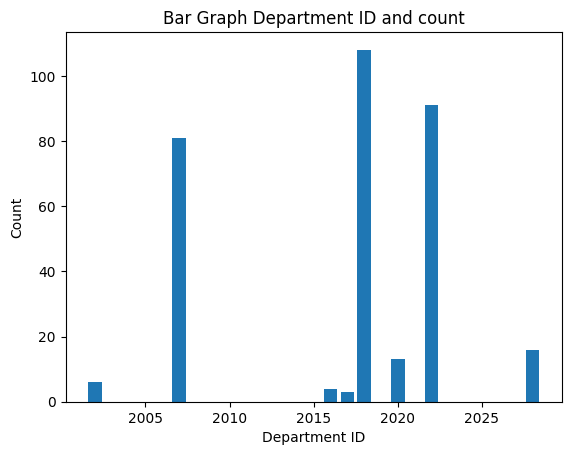

In [ ]:
import matplotlib.pyplot as plt

# Count the occurrences of each unique value
unique_values, counts = np.unique(ypred, return_counts=True)

# Create a bar graph
plt.bar(unique_values, counts)

# Set labels and title
plt.xlabel('Department ID')
plt.ylabel('Count')
plt.title('Bar Graph Department ID and count')

# Show the plot
plt.show()